In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Project will consist of the following steps:

📊 **Data collection:** We'll collect the Amazon products dataset from Kaggle.

🧹 **Data preparation:** We'll clean and preprocess the dataset for analysis.

🕵️‍♂️ **Exploratory data analysis:** We'll analyze the data to understand the distribution of products by categories, customer ratings, and reviews.

📈 **Data visualization:** We'll visualize the data to identify trends and patterns.

💡 **Simples recommendation system:** We'll develop a recommendation system using machine learning algorithms to suggest products to users based on their interests and previous purchases.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('./amazon.csv')  

# Data Overview

In [68]:
# Display the first few rows of the dataset
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [69]:
# Check the dimensions of the dataset
print('Dataset dimensions:', df.shape)

Dataset dimensions: (1465, 16)


In [70]:
# Inspect the column names
print('Column names:', df.columns)

Column names: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


# Data Cleaning

In [71]:
# Check for missing values in each column
print('Missing values:\n', df.isnull().sum())

Missing values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [72]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [73]:
# Convert price columns to numeric (if needed)
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)


# Data Visualization

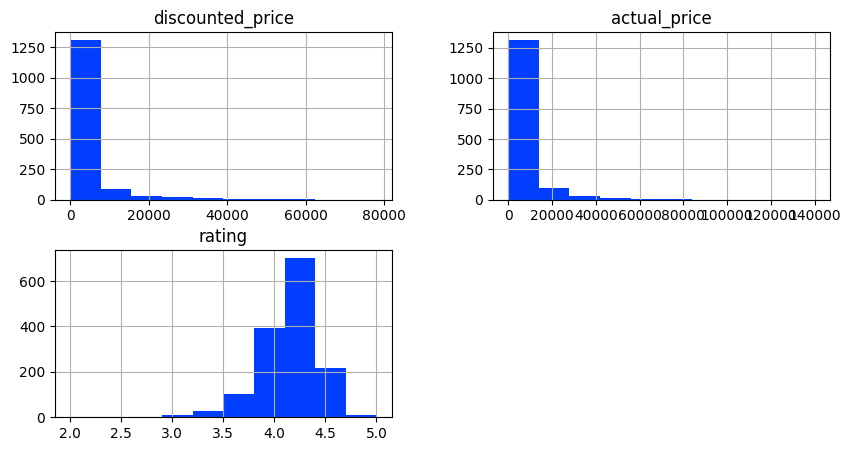

In [74]:
# Histogram of numeric variables
numeric_vars = ['discounted_price', 'actual_price', 'rating', 'rating_count']
df[numeric_vars].hist(bins=10, figsize=(10, 5))
plt.show()

Text(0.5, 0, 'Count')

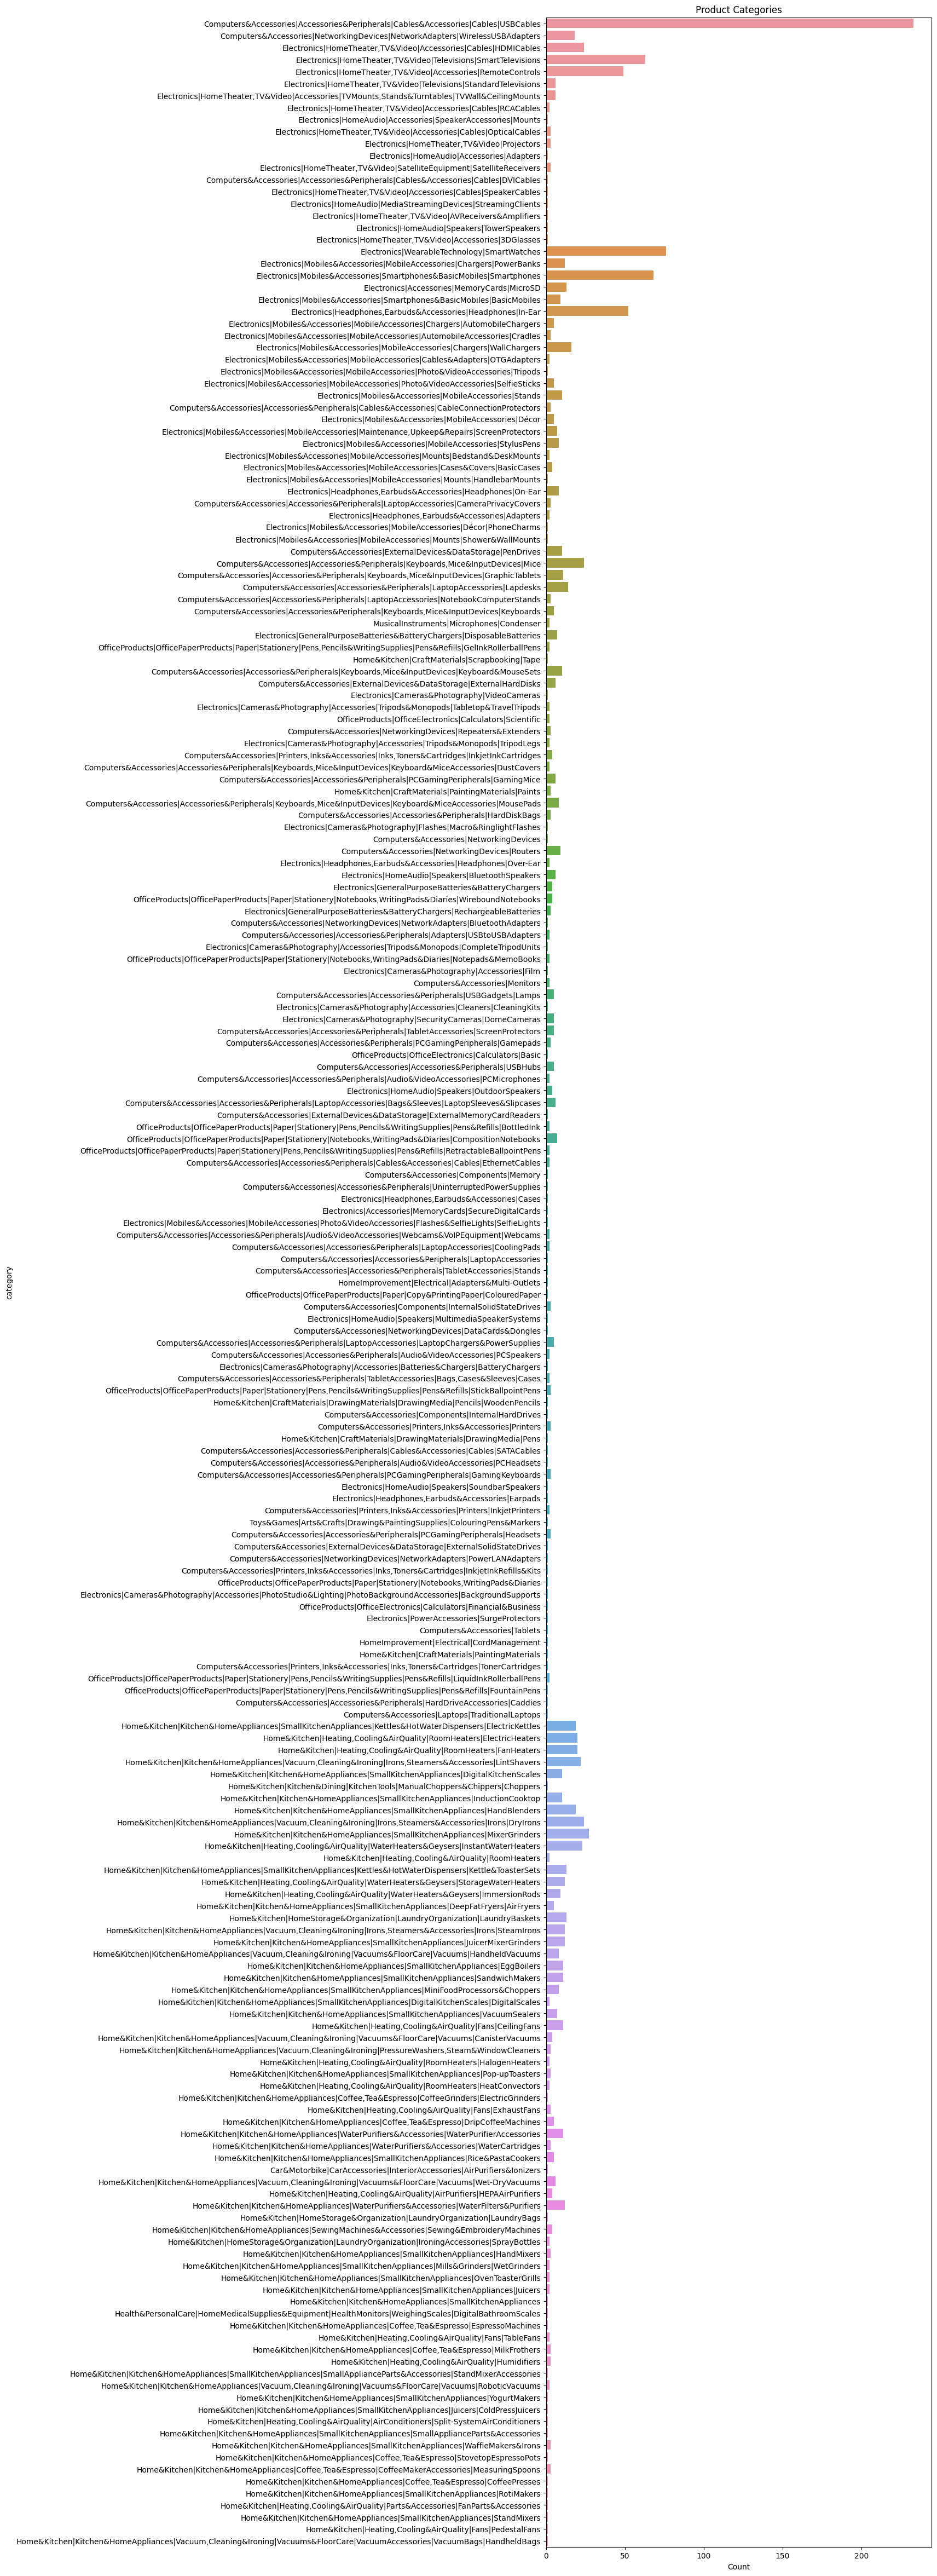

In [75]:
# Set the color palette
sns.set_palette('bright')

# Create multiple visualizations
plt.figure(figsize=(20, 60))

# Plotting a bar chart of product categories
plt.subplot(1, 2, 1)
sns.countplot(data=df, y='category')
plt.title('Product Categories')
plt.xlabel('Count')

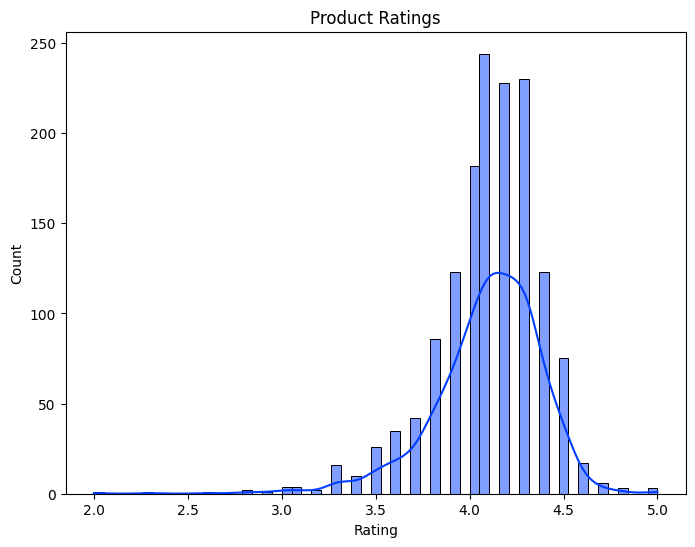

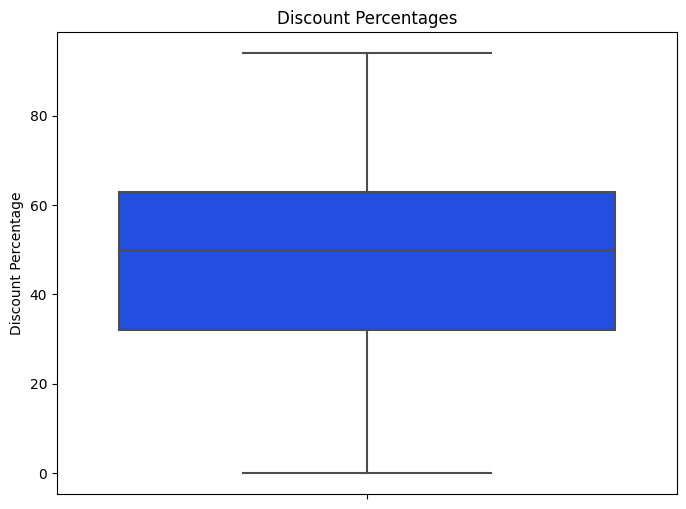

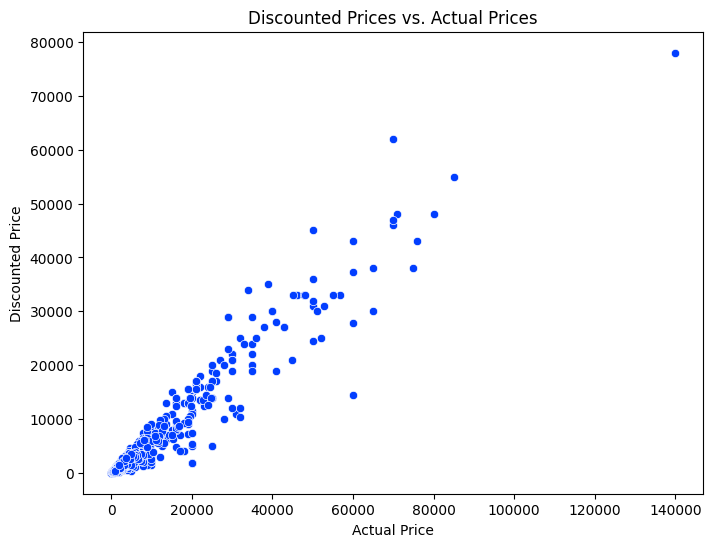

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preprocess the 'discount_percentage' column
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

# Set the color palette
sns.set_palette('bright')

# Plotting a histogram of product ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='rating', kde=True)
plt.title('Product Ratings')
plt.xlabel('Rating')
plt.show()

# Plotting a boxplot of discount percentages
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='discount_percentage')
plt.title('Discount Percentages')
plt.ylabel('Discount Percentage')
plt.show()

# Plotting a scatter plot of discounted prices vs. actual prices
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='actual_price', y='discounted_price')
plt.title('Discounted Prices vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()


In [77]:

for x in numeric_vars:
    df[x] = [float(str(i).replace(",", "")) for i in df[x]]
    

# Correlation Analysis

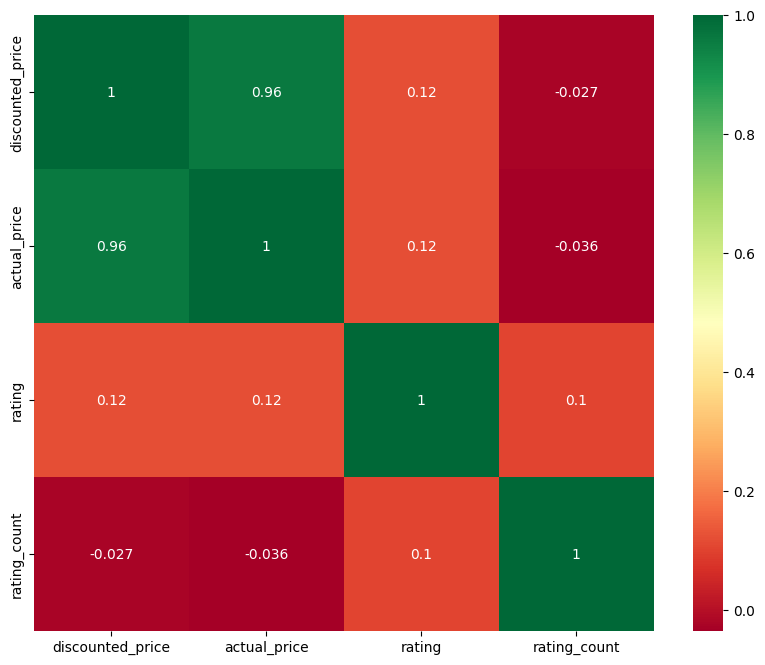

In [78]:
# Compute the correlation matrix
correlation_matrix = df[numeric_vars].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.show()


# Text Analysis

In [79]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [80]:
df = pd.read_csv('./amazon.csv')  # Replace 'amazon_products.csv' with your actual dataset file


# Data Preprocessing

In [81]:
# Drop irrelevant columns
df = df[['product_id', 'product_name', 'category', 'rating', 'review_content']]


In [82]:

# Convert 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [83]:

# Drop rows with missing values
df.dropna(subset=['product_name', 'rating', 'review_content'], inplace=True)

In [84]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [85]:
df.head()

,product_id,product_name,category,rating,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,4.2,Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,4.0,I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,3.9,"Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,4.2,"Bought this instead of original apple, does th..."


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1465 non-null   object 
 1   product_name    1465 non-null   object 
 2   category        1465 non-null   object 
 3   rating          1465 non-null   float64
 4   review_content  1465 non-null   object 
dtypes: float64(1), object(4)
memory usage: 57.4+ KB


# Text Preprocessing

In [87]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re

In [88]:
# Initialize tokenizer and stopwords
import nltk
nltk.download("stopwords")
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/satwik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = tokenizer.tokenize(text)  # Tokenize text
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

In [90]:
# Apply text preprocessing to 'product_name' and 'review_content' columns
df['product_name'] = df['product_name'].apply(preprocess_text)
df['review_content'] = df['review_content'].apply(preprocess_text)

# Calculate Product Similarity

In [91]:
# Combine 'product_name' and 'review_content' into a single text column
df['text'] = df['product_name'] + ' ' + df['review_content']

In [92]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()


In [93]:
# Apply TF-IDF vectorization to 'text' column
tfidf_matrix = vectorizer.fit_transform(df['text'])

In [94]:
# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

#  Get Product Recommendations

In [95]:
def get_product_recommendations(product_id, num_recommendations=8):
    # Get the index of the product with the given ID
    index = df[df['product_id'] == product_id].index[0]

    # Get the pairwise similarity scores of the product
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the products based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top N similar products
    top_products = [df.iloc[score[0]] for score in sim_scores[1:num_recommendations+1]]

    return top_products


In [96]:
product_id = 'B08WRBG3XW'  # Replace with the actual product ID
recommendations = get_product_recommendations(product_id)
print(recommendations)

[product_id                                               B08WRBG3XW
product_name      boat type c tangle free sturdy type c cable ra...
category          Computers&Accessories|Accessories&Peripherals|...
rating                                                          4.1
review_content    check offera buying w charging cable awesome c...
text              boat type c tangle free sturdy type c cable ra...
Name: 472, dtype: object, product_id                                               B08NW8GHCJ
product_name      synqe usb c usb c w nylon braided fast chargin...
category          Computers&Accessories|Accessories&Peripherals|...
rating                                                          4.3
review_content    used cable months sturdy really like cable len...
text              synqe usb c usb c w nylon braided fast chargin...
Name: 314, dtype: object, product_id                                               B08V9C4B1J
product_name      synqe type c type c short fast charging w cab

In [97]:
import pickle

In [98]:
pickle.dump(df, open('amazon.pkl', 'wb'))

In [100]:
pickle.dump(df.to_dict(), open('amazon_dict.pkl', 'wb'))

In [102]:
pickle.dump(cosine_sim, open('similarity.pkl', 'wb'))